In [2]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:

# For reading stock data from yahoo
from __future__ import division
from pandas_datareader import DataReader
#import fix_yahoo_finance as yf

# For time stamps
from datetime import datetime

In [7]:
# List of Tech_stocks for analytics
tech_list = ['AAPL','AMZN','FB','GOOG','NFLX','TSLA']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For-loop for grabing Yahoo finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [8]:
AAPL.head()


High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2020-04-13  68.425003  66.457497  67.077499  68.312500  131022800.0  67.787041
2020-04-14  72.062500  69.512497  70.000000  71.762497  194994800.0  71.210495
2020-04-15  71.582497  70.157501  70.599998  71.107498  131154400.0  70.560539
2020-04-16  72.050003  70.587502  71.845001  71.672501  157125200.0  71.121201
2020-04-17  71.737503  69.214996  71.172501  70.699997  215250000.0  70.156174

In [9]:
AAPL.describe()

High         Low        Open       Close        Volume  \
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02   
mean   111.935000  108.945158  110.515764  110.495714  1.339641e+08   
std     20.207563   19.577983   20.062302   19.869150  5.213347e+07   
min     68.425003   66.357498   67.077499   67.092499  4.669130e+07   
25%     95.148752   93.421877   94.098125   94.473124  9.684185e+07   
50%    118.216251  115.044998  116.619999  116.340000  1.208433e+08   
75%    126.446873  122.855625  124.725626  124.871248  1.577413e+08   
max    145.089996  141.369995  143.600006  143.160004  3.743368e+08   

        Adj Close  
count  252.000000  
mean   110.201710  
std     19.996394  
min     66.576424  
25%     94.000210  
50%    116.136131  
75%    124.646374  
max    142.946396

In [10]:

# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-04-13 to 2021-04-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

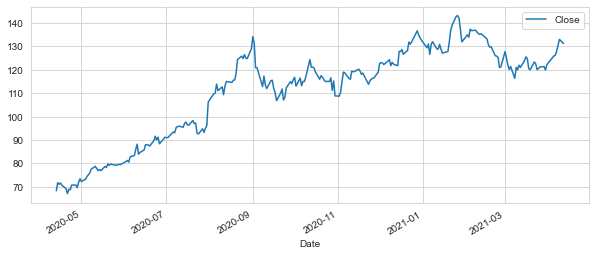

In [11]:

# Let's see a historical view of the closing price
AAPL['Close'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

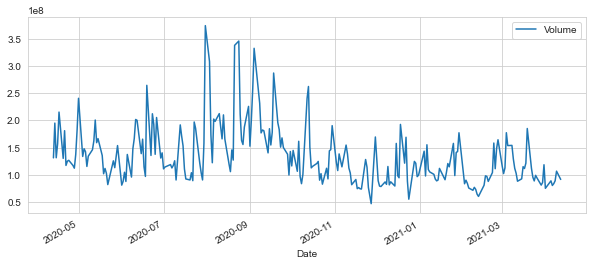

In [12]:
# Now let's plot the total volume of stock being traded each day over the past year

AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [13]:

# Pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
from numpy import *

MA_day = [10,20,50,100]
s1 = pd.Series(MA_day)

for ma in s1:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = pd.Series.rolling(FL['Close'],ma).mean()

<AxesSubplot:xlabel='Date'>

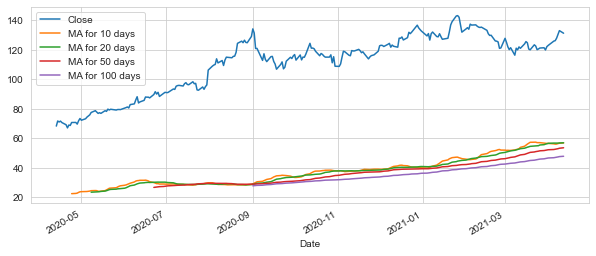

In [14]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))


<AxesSubplot:xlabel='Date'>

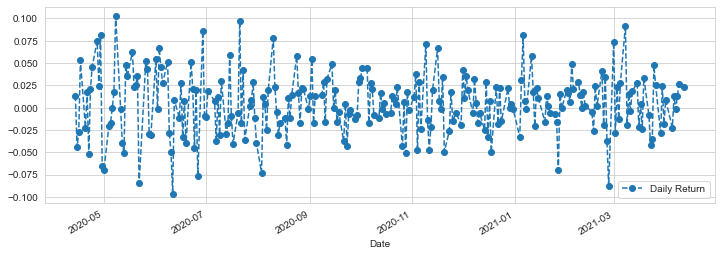

In [15]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = FL['Close'].pct_change()

# Lets plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')


<AxesSubplot:>

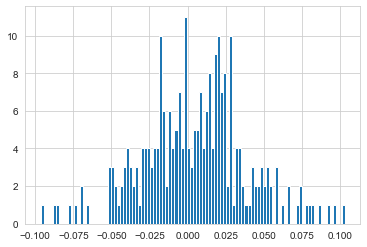

In [16]:
# only with histogram
AAPL['Daily Return'].hist(bins=100)

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

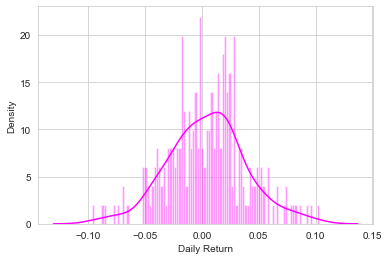

In [17]:
import warnings
warnings.filterwarnings("ignore")
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='magenta')

In [18]:
# Grab all the closing prices for the tech stock list into one DataFrame

closingprice_df = DataReader(tech_list, 'yahoo', start, end)['Close']

In [19]:
closingprice_df.head(10)


Symbols          AAPL         AMZN          FB         GOOG        NFLX  \
Date                                                                      
2020-04-13  68.312500  2168.870117  174.789993  1217.560059  396.720001   
2020-04-14  71.762497  2283.320068  178.169998  1269.229980  413.549988   
2020-04-15  71.107498  2307.679932  176.970001  1262.469971  426.750000   
2020-04-16  71.672501  2408.189941  176.250000  1263.469971  439.170013   
2020-04-17  70.699997  2375.000000  179.240005  1283.250000  422.959991   
2020-04-20  69.232498  2393.610107  178.240005  1266.609985  437.489990   
2020-04-21  67.092499  2328.120117  170.800003  1216.339966  433.829987   
2020-04-22  69.025002  2363.489990  182.279999  1263.209961  421.420013   
2020-04-23  68.757500  2399.449951  185.130005  1276.310059  426.700012   
2020-04-24  70.742500  2410.219971  190.070007  1279.310059  424.989990   

Symbols           TSLA  
Date                    
2020-04-13  130.190002  
2020-04-14  141.977997  
2020-04-15  145.966003  
2020-04-16  149.042007  
2020-04-17  150.778000  
2020-04-20  149.272003  
2020-04-21  137.343994  
2020-04-22  146.421997  
2020-04-23  141.126007  
2020-04-24  145.029999

In [20]:

# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [21]:
tech_returns.head()


Symbols         AAPL      AMZN        FB      GOOG      NFLX      TSLA
Date                                                                  
2020-04-13       NaN       NaN       NaN       NaN       NaN       NaN
2020-04-14  0.050503  0.052769  0.019338  0.042437  0.042423  0.090545
2020-04-15 -0.009127  0.010669 -0.006735 -0.005326  0.031919  0.028089
2020-04-16  0.007946  0.043555 -0.004068  0.000792  0.029104  0.021073
2020-04-17 -0.013569 -0.013782  0.016965  0.015655 -0.036911  0.011648

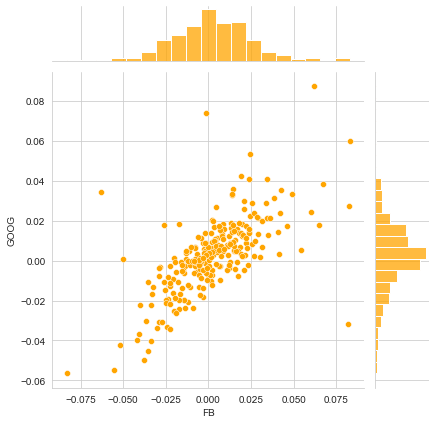

In [22]:
# We'll use joinplot to compare the daily returns of Facebook and Google.
sns.jointplot('FB','GOOG',tech_returns,kind='scatter',color='orange')

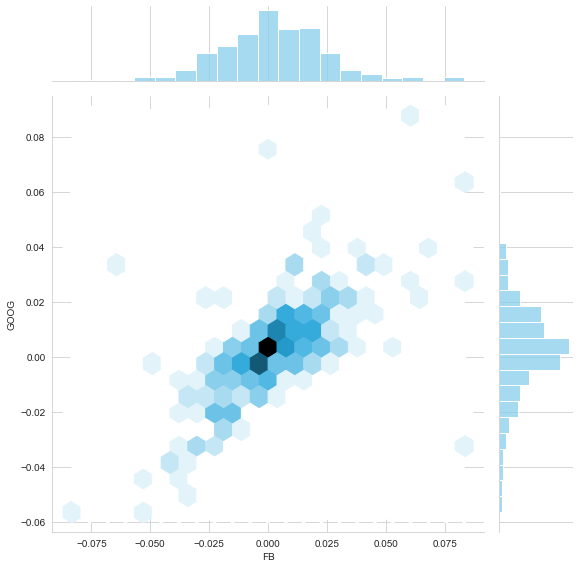

In [23]:
# with Hex plot
sns.jointplot('FB','GOOG',tech_returns, kind='hex',height=8, color='skyblue')

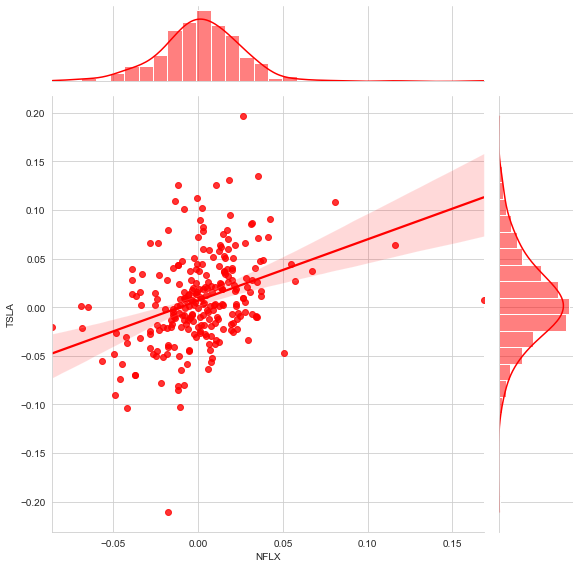

In [24]:
# Lets check out for NETLIX and TESLA with reg jointplot
import scipy.stats

sns.jointplot('NFLX','TSLA',tech_returns, kind='reg', height=8, color='red')

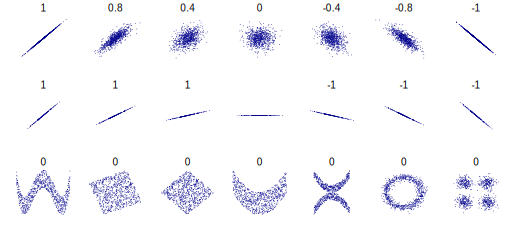

In [25]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

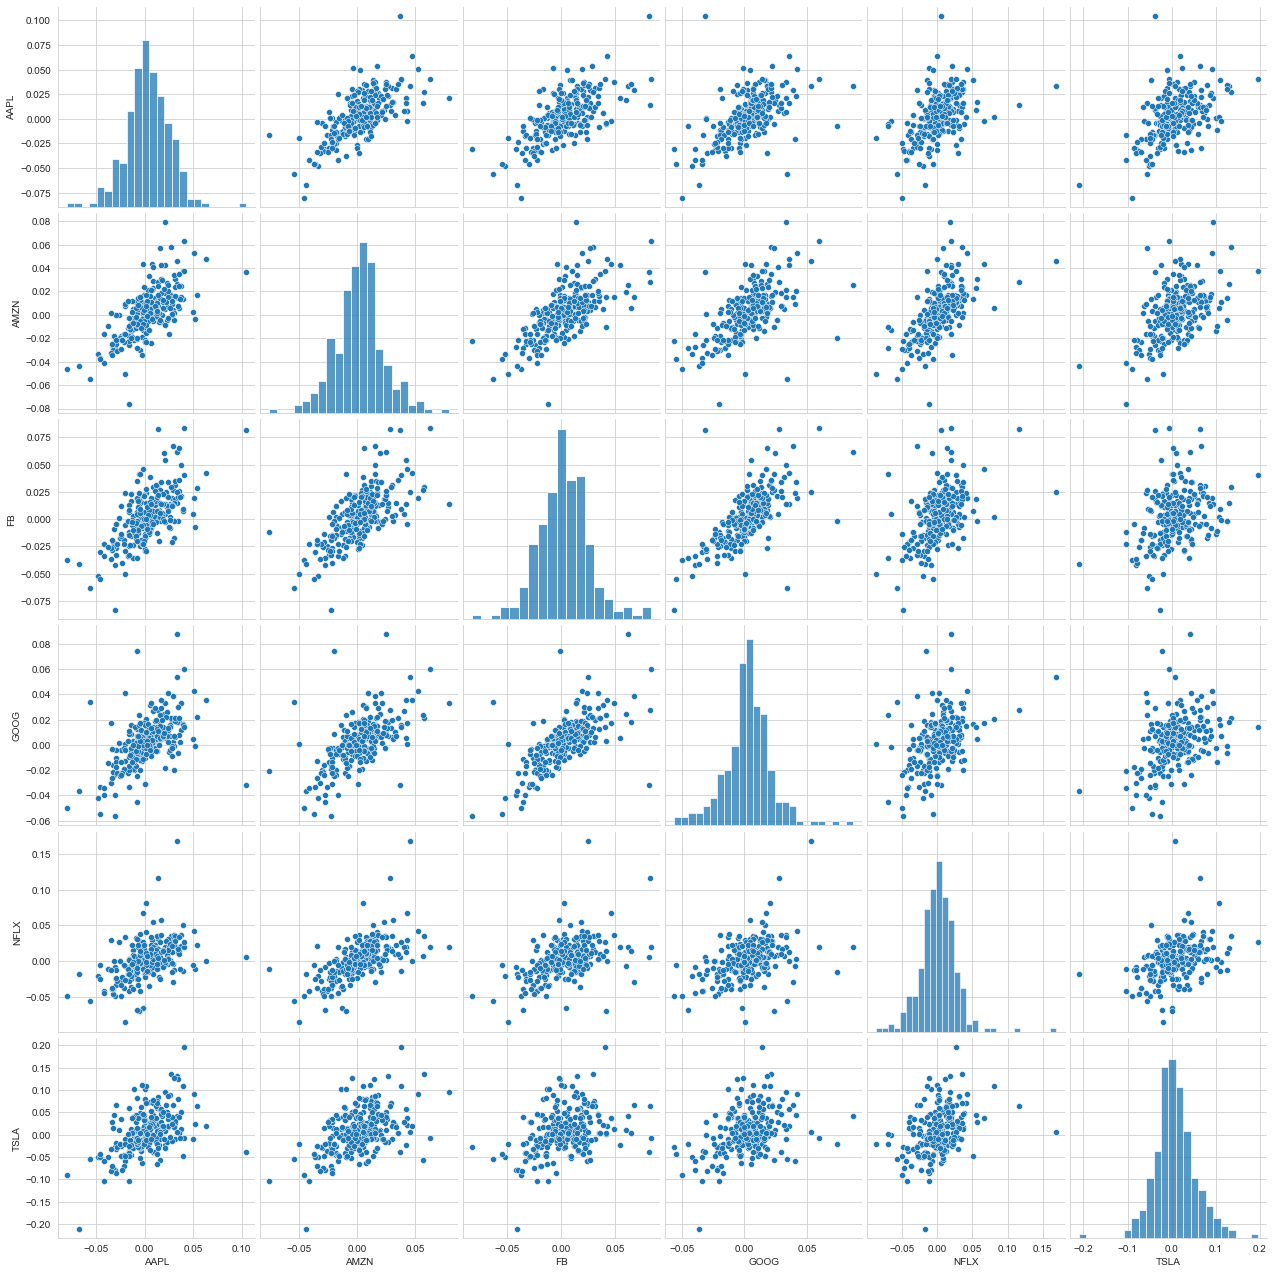

In [26]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna(),height=3)

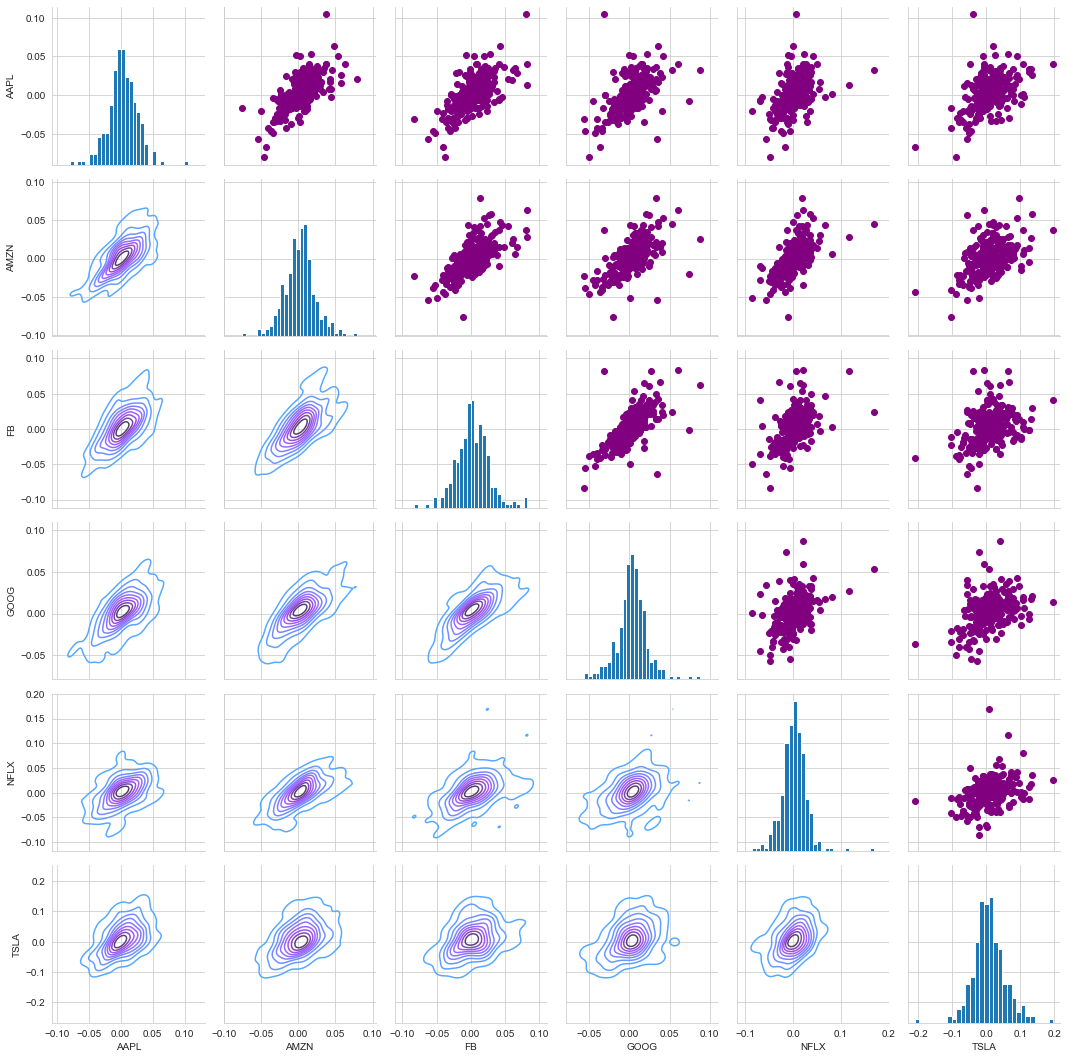

In [27]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

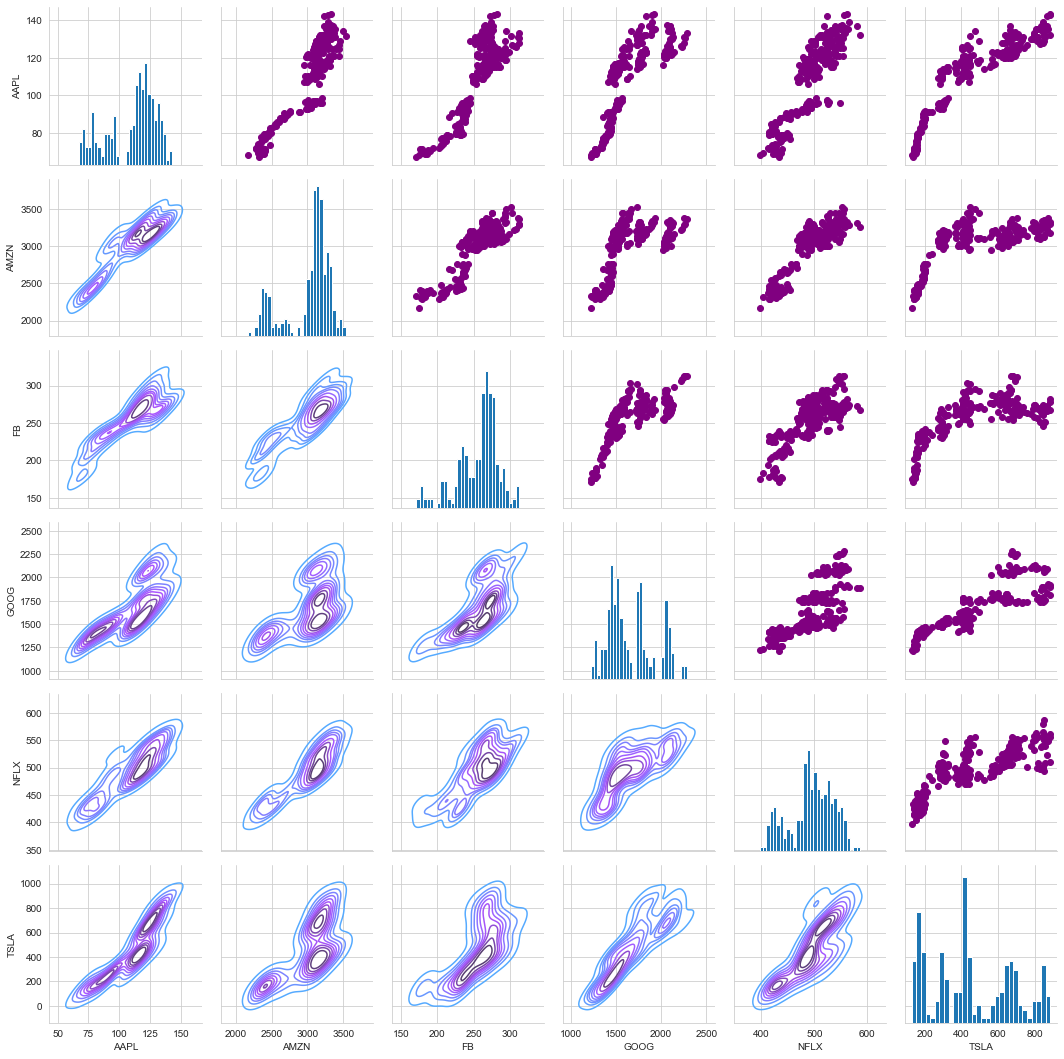

In [28]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

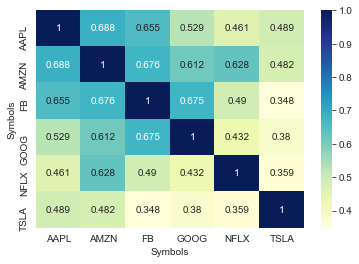

In [31]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

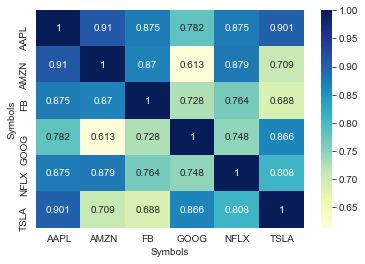

In [32]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

In [33]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()

In [34]:
rets.head()


Symbols         AAPL      AMZN        FB      GOOG      NFLX      TSLA
Date                                                                  
2020-04-14  0.050503  0.052769  0.019338  0.042437  0.042423  0.090545
2020-04-15 -0.009127  0.010669 -0.006735 -0.005326  0.031919  0.028089
2020-04-16  0.007946  0.043555 -0.004068  0.000792  0.029104  0.021073
2020-04-17 -0.013569 -0.013782  0.016965  0.015655 -0.036911  0.011648
2020-04-20 -0.020757  0.007836 -0.005579 -0.012967  0.034353 -0.009988

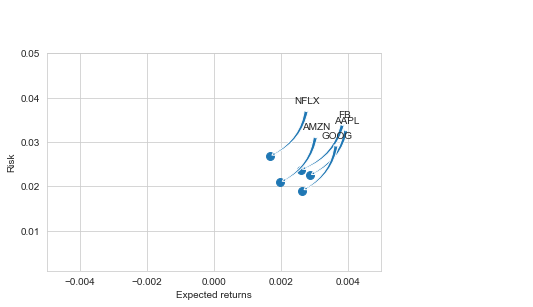

In [35]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.005,0.005])
plt.ylim([0.001,0.05])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

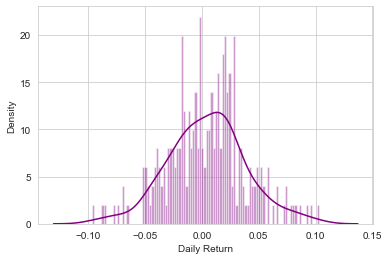

In [37]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [38]:
# The 0.05 empirical quantile of daily returns

# For APPL stocks
rets["AAPL"].quantile(0.05)

-0.03315364728703246

In [39]:
# For AMZN stocks
rets["AMZN"].quantile(0.05)

-0.030510126242347446

In [40]:
# For FB stocks
rets["FB"].quantile(0.05)

-0.03393728637564608

In [41]:
# For GOOG stocks
rets["GOOG"].quantile(0.05)

-0.03087263446926558

In [42]:
# For NFLX stocks
rets["NFLX"].quantile(0.05)

-0.040337029628360166

In [43]:
# For TSLA stocks
rets["TSLA"].quantile(0.05)

-0.060971606062180495

In [44]:
rets.head()


Symbols         AAPL      AMZN        FB      GOOG      NFLX      TSLA
Date                                                                  
2020-04-14  0.050503  0.052769  0.019338  0.042437  0.042423  0.090545
2020-04-15 -0.009127  0.010669 -0.006735 -0.005326  0.031919  0.028089
2020-04-16  0.007946  0.043555 -0.004068  0.000792  0.029104  0.021073
2020-04-17 -0.013569 -0.013782  0.016965  0.015655 -0.036911  0.011648
2020-04-20 -0.020757  0.007836 -0.005579 -0.012967  0.034353 -0.009988

# Monte-Carlo Method

In [45]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for Facebook
mu = rets.mean()['FB']

# Now let's grab the volatility of the stock from the std() of the average return for Facebook
sigma = rets.std()['FB']


In [46]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [47]:
# For Facebook Stock - Facebook
FB.head()

High         Low        Open       Close    Volume  \
Date                                                                   
2020-04-13  175.000000  169.449997  173.669998  174.789993  19355400   
2020-04-14  181.229996  176.619995  178.979996  178.169998  21011800   
2020-04-15  178.190002  172.820007  175.190002  176.970001  17423000   
2020-04-16  178.050003  172.509995  177.949997  176.250000  23593200   
2020-04-17  180.279999  176.660004  179.199997  179.240005  20974800   

             Adj Close  
Date                    
2020-04-13  174.789993  
2020-04-14  178.169998  
2020-04-15  176.970001  
2020-04-16  176.250000  
2020-04-17  179.240005

Text(0.5, 1.0, 'Monte Carlo Analysis for Facebook')

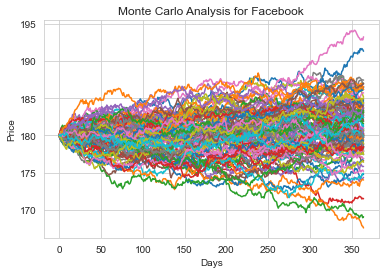

In [48]:
start_price = 179.97

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Facebook')

In [49]:
GOOG.head()

High          Low         Open        Close   Volume  \
Date                                                                      
2020-04-13  1220.510010  1187.598022  1209.180054  1217.560059  1739800   
2020-04-14  1282.069946  1236.930054  1245.089966  1269.229980  2470400   
2020-04-15  1280.459961  1240.400024  1245.609985  1262.469971  1671700   
2020-04-16  1279.000000  1242.619995  1274.099976  1263.469971  2518100   
2020-04-17  1294.430054  1271.229980  1284.849976  1283.250000  1949000   

              Adj Close  
Date                     
2020-04-13  1217.560059  
2020-04-14  1269.229980  
2020-04-15  1262.469971  
2020-04-16  1263.469971  
2020-04-17  1283.250000

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

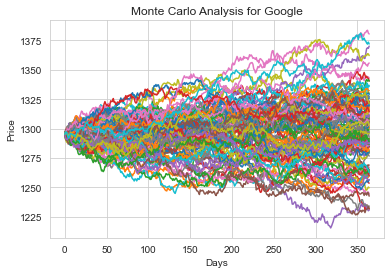

In [50]:
start_price = 1295.04

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [53]:
# For Apple Stock - AAPL
AAPL.head()

High        Low       Open      Close       Volume  \
Date                                                                  
2020-04-13  68.425003  66.457497  67.077499  68.312500  131022800.0   
2020-04-14  72.062500  69.512497  70.000000  71.762497  194994800.0   
2020-04-15  71.582497  70.157501  70.599998  71.107498  131154400.0   
2020-04-16  72.050003  70.587502  71.845001  71.672501  157125200.0   
2020-04-17  71.737503  69.214996  71.172501  70.699997  215250000.0   

            Adj Close  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                    
2020-04-13  67.787041             NaN             NaN             NaN   
2020-04-14  71.210495             NaN             NaN             NaN   
2020-04-15  70.560539             NaN             NaN             NaN   
2020-04-16  71.121201             NaN             NaN             NaN   
2020-04-17  70.156174             NaN             NaN             NaN   

            MA for 100 days  Daily Return  
Date                                       
2020-04-13              NaN           NaN  
2020-04-14              NaN      0.013426  
2020-04-15              NaN     -0.044444  
2020-04-16              NaN     -0.027728  
2020-04-17              NaN      0.052898

Text(0.5, 1.0, 'Monte Carlo Analysis for APPLE')

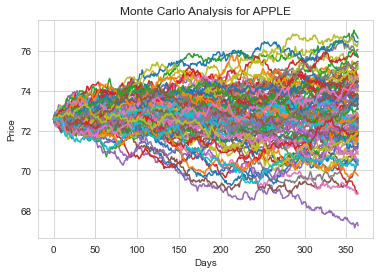

In [55]:
start_price = 72.58

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for APPLE')

In [56]:
# For Netlix Stock - NFLX
NFLX.head()

High         Low        Open       Close    Volume  \
Date                                                                   
2020-04-13  400.510010  367.700012  371.309998  396.720001  11692900   
2020-04-14  417.820007  394.850006  397.500000  413.549988  11581000   
2020-04-15  434.980011  412.250000  413.000000  426.750000  13561200   
2020-04-16  449.519989  431.609985  437.000000  439.170013  16128700   
2020-04-17  432.000000  414.700012  431.000000  422.959991  12616300   

             Adj Close  
Date                    
2020-04-13  396.720001  
2020-04-14  413.549988  
2020-04-15  426.750000  
2020-04-16  439.170013  
2020-04-17  422.959991

Text(0.5, 1.0, 'Monte Carlo Analysis for NETFLIX')

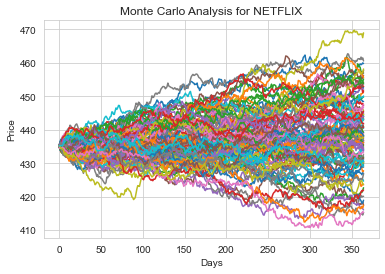

In [58]:
start_price = 435.16

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for NETFLIX')

In [59]:
# For Amazon Stock - AMZN
AMZN.head()

High          Low         Open        Close    Volume  \
Date                                                                       
2020-04-13  2180.000000  2038.000000  2040.000000  2168.870117   6716700   
2020-04-14  2292.000000  2186.209961  2200.469971  2283.320068   8087200   
2020-04-15  2333.370117  2245.000000  2257.679932  2307.679932   6866600   
2020-04-16  2461.000000  2335.000000  2346.000000  2408.189941  12038200   
2020-04-17  2400.000000  2316.020020  2372.330078  2375.000000   7930000   

              Adj Close  
Date                     
2020-04-13  2168.870117  
2020-04-14  2283.320068  
2020-04-15  2307.679932  
2020-04-16  2408.189941  
2020-04-17  2375.000000

Text(0.5, 1.0, 'Monte Carlo Analysis for AMAZON')

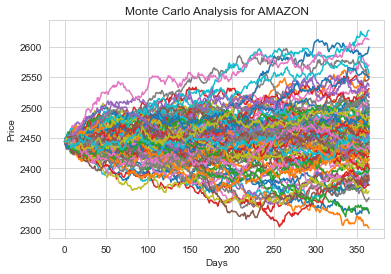

In [60]:

start_price = 2444.25

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for AMAZON')

In [61]:
# For Tesla Stock - TSLA
TSLA.head()

High         Low        Open       Close       Volume  \
Date                                                                      
2020-04-13  130.399994  116.106003  118.031998  130.190002  112377000.0   
2020-04-14  148.376007  138.485992  139.794006  141.977997  152882500.0   
2020-04-15  150.626007  142.000000  148.399994  145.966003  117885000.0   
2020-04-16  151.889999  141.343994  143.388000  149.042007  103289500.0   
2020-04-17  154.990005  149.531998  154.455994  150.778000   65641000.0   

             Adj Close  
Date                    
2020-04-13  130.190002  
2020-04-14  141.977997  
2020-04-15  145.966003  
2020-04-16  149.042007  
2020-04-17  150.778000

Text(0.5, 1.0, 'Monte Carlo Analysis for TESLA')

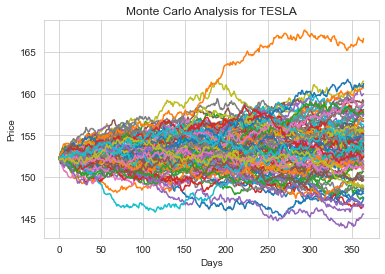

In [62]:

start_price = 152.25

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for TESLA')

In [63]:
# Lets start with Google stock price
start_price = 1295.04

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock (GOOG) after 365 days')

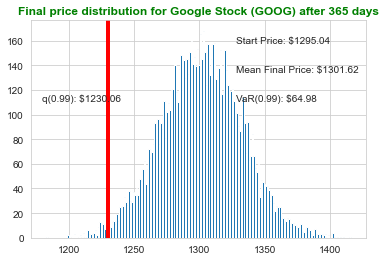

In [65]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Google Stock (GOOG) after %s days" % days, weight='bold', color='Green')

In [66]:

# Facebook stock price
start_price = 179.97

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Facebook Stock (FB) after 365 days')

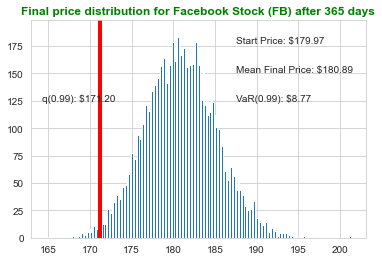

In [67]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Facebook Stock (FB) after %s days" % days, weight='bold', color='Green')

In [68]:

# Foot APPLE stock price
start_price = 72.58

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for APPLE Stock (AAPL) after 365 days')

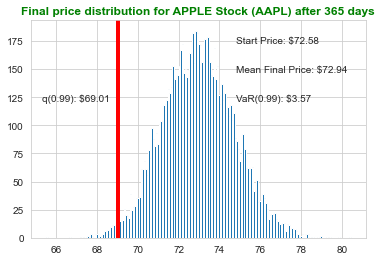

In [69]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for APPLE Stock (AAPL) after %s days" % days, weight='bold', color='Green')

In [70]:
# For NETFLIX stock price
start_price = 435.16

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for NETFLIX Stock (NFLX) after 365 days')

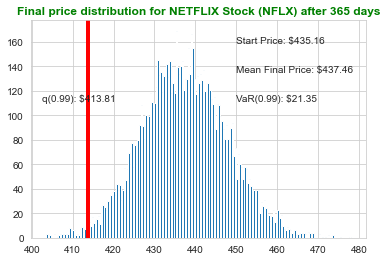

In [72]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for NETFLIX Stock (NFLX) after %s days" % days, weight='bold', color='Green')

In [73]:
# For AMAZON stock price
start_price = 2444.25

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for AMAZON Stock (AMZN) after 365 days')

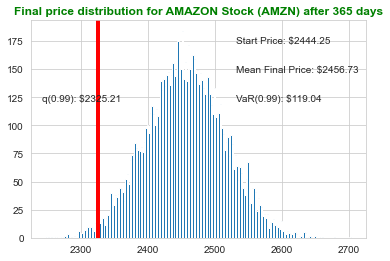

In [74]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for AMAZON Stock (AMZN) after %s days" % days, weight='bold', color='Green')

In [75]:
# For TESLA stock price
start_price = 152.25

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for TESLA Stock (TSLA) after 365 days')

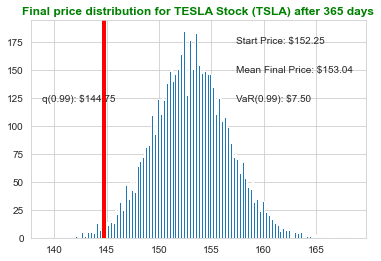

In [76]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for TESLA Stock (TSLA) after %s days" % days, weight='bold', color='Green')